
1. does duplicate gameweeks values need to be removed or are they double gameweeksfor gameweeks less than 4. the form will be current gameweeks / 10 or how will it be calculated.
2. the largest sum of total points on average per position. per season or for all season.
3. 2B - how to find the highest form. is it the average or what


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno

# ________________________________________________
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
from keras import Sequential, Input 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from tensorflow.keras.metrics import Precision, Recall 

2025-10-21 18:30:24.118279: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761071424.472825      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761071424.555780      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# the main dataset

df = pd.read_csv('/kaggle/input/long-pl-dataset/cleaned_merged_seasons.csv')  
df.head(101) # This shows you the first 5 rows of the table!

/tmp/ipykernel_13/2190561680.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/long-pl-dataset/cleaned_merged_seasons.csv')


,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,...,2.0,0.0,0,0,0,0,55,False,0,1
1,2016-17,Aaron Lennon,MID,NaN,0,0,6,0,0.3,142,...,1.0,0.0,1,0,0,0,60,True,0,1
2,2016-17,Aaron Ramsey,MID,NaN,0,0,5,0,4.9,16,...,3.0,23.0,2,0,0,0,80,True,0,1
3,2016-17,Abdoulaye Doucouré,MID,NaN,0,0,0,0,0.0,482,...,1.0,0.0,0,0,0,0,50,False,0,1
4,2016-17,Adam Forshaw,MID,NaN,0,0,3,0,1.3,286,...,1.0,0.0,1,0,0,0,45,True,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2016-17,Joel Ward,DEF,NaN,0,0,5,0,3.3,105,...,0.0,8.0,2,0,0,0,50,True,0,1
97,2016-17,Joe Hart,GK,NaN,0,0,0,0,0.0,218,...,2.0,0.0,0,0,0,0,55,True,0,1
98,2016-17,Johann Berg Gudmundsson,MID,NaN,0,0,1,0,1.2,473,...,0.0,8.0,1,0,0,0,55,True,0,1
99,2016-17,John Stones,DEF,NaN,0,0,15,0,2.8,128,...,2.0,2.0,2,0,0,0,50,True,0,1


In [3]:
# the list of teams in each year

temp_df = pd.read_csv('/kaggle/input/long-pl-dataset/master_team_list.csv')  
temp_df.head(40) # This shows you the first 5 rows of the table!

,season,team,team_name
0,2016-17,1,Arsenal
1,2016-17,2,Bournemouth
2,2016-17,3,Burnley
3,2016-17,4,Chelsea
4,2016-17,5,Crystal Palace
5,2016-17,6,Everton
6,2016-17,7,Hull
7,2016-17,8,Leicester
8,2016-17,9,Liverpool
9,2016-17,10,Man City


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96169 entries, 0 to 96168
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season_x           96169 non-null  object 
 1   name               96169 non-null  object 
 2   position           96169 non-null  object 
 3   team_x             76317 non-null  object 
 4   assists            96169 non-null  int64  
 5   bonus              96169 non-null  int64  
 6   bps                96169 non-null  int64  
 7   clean_sheets       96169 non-null  int64  
 8   creativity         96169 non-null  float64
 9   element            96169 non-null  int64  
 10  fixture            96169 non-null  int64  
 11  goals_conceded     96169 non-null  int64  
 12  goals_scored       96169 non-null  int64  
 13  ict_index          96169 non-null  float64
 14  influence          96169 non-null  float64
 15  kickoff_time       96169 non-null  object 
 16  minutes            961

In [5]:
df.describe() 

,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,...,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,yellow_cards,GW
count,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,...,96169.000000,96169.000000,96169.000000,96169.000000,9.616900e+04,9.616900e+04,9.616900e+04,96169.000000,96169.000000,96169.000000
mean,0.041042,0.108715,6.080275,0.106739,4.734000,327.063264,198.413824,0.495887,0.045514,1.715793,...,1.265158,1.516393,5.287598,1.379270,1.677100e+03,1.454716e+04,1.286945e+04,51.352390,0.053167,20.772099
std,0.215378,0.492334,9.850595,0.308783,10.689879,194.313766,108.884200,0.974269,0.233644,3.042551,...,1.229086,1.349184,13.368420,2.542535,6.581628e+04,5.725343e+04,4.840128e+04,12.667432,0.224367,10.941742
min,0.000000,0.000000,-21.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-7.000000,-2.180978e+06,0.000000e+00,0.000000e+00,37.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,159.000000,105.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,-1.374000e+03,4.600000e+01,1.280000e+02,44.000000,0.000000,11.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,318.000000,203.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,-5.800000e+01,4.380000e+02,1.104000e+03,48.000000,0.000000,22.000000
75%,0.000000,0.000000,10.000000,0.000000,2.400000,486.000000,293.000000,1.000000,0.000000,2.500000,...,2.000000,2.000000,2.000000,2.000000,7.900000e+01,5.042000e+03,7.562000e+03,54.000000,0.000000,30.000000
max,4.000000,3.000000,128.000000,1.000000,170.900000,778.000000,380.000000,9.000000,4.000000,32.800000,...,7.000000,9.000000,186.000000,29.000000,1.983733e+06,2.104464e+06,2.233619e+06,133.000000,1.000000,38.000000


In [6]:
df.isnull().sum()

season_x                 0
name                     0
position                 0
team_x               19852
assists                  0
bonus                    0
bps                      0
clean_sheets             0
creativity               0
element                  0
fixture                  0
goals_conceded           0
goals_scored             0
ict_index                0
influence                0
kickoff_time             0
minutes                  0
opponent_team            0
opp_team_name            0
own_goals                0
penalties_missed         0
penalties_saved          0
red_cards                0
round                    0
saves                    0
selected                 0
team_a_score             0
team_h_score             0
threat                   0
total_points             0
transfers_balance        0
transfers_in             0
transfers_out            0
value                    0
was_home                 0
yellow_cards             0
GW                       0
d

<Axes: >

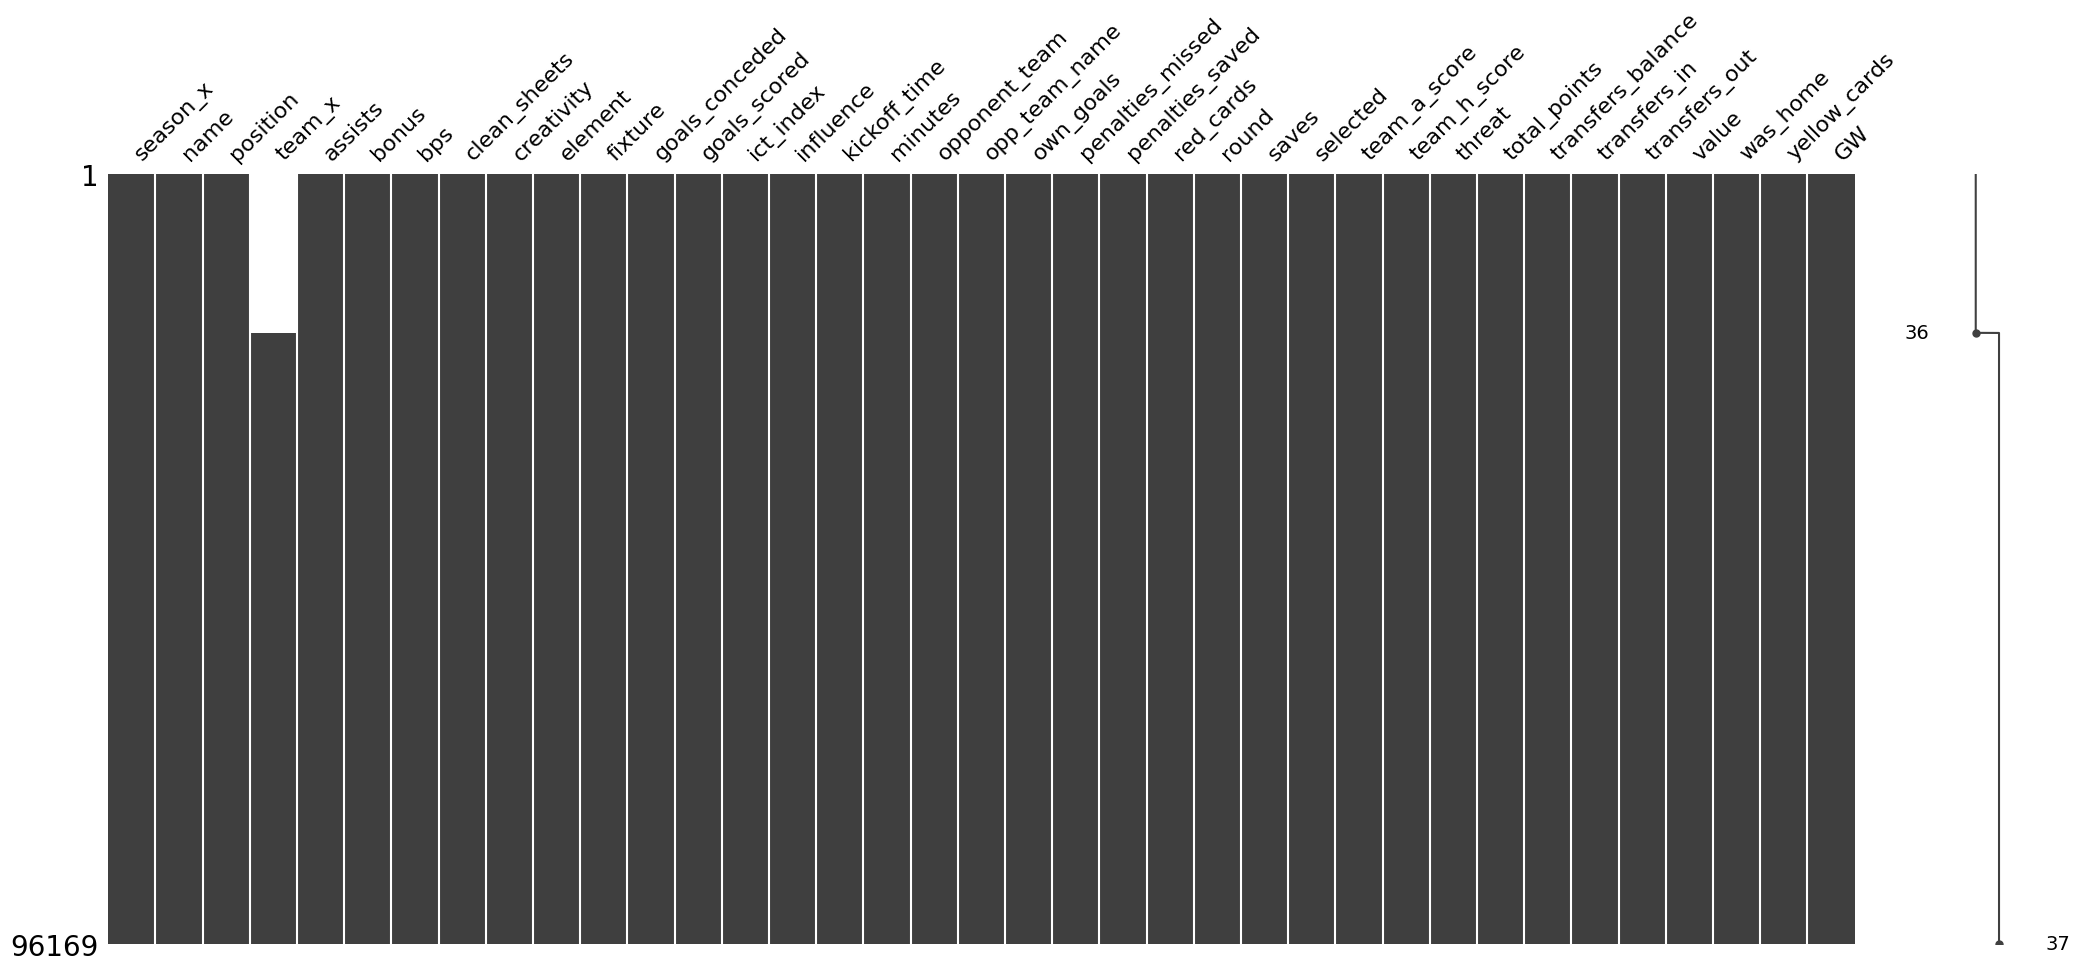

In [7]:
msno.matrix(df)

In [8]:
# listing the list of attributes in the dataset

df.columns.tolist()

['season_x',
 'name',
 'position',
 'team_x',
 'assists',
 'bonus',
 'bps',
 'clean_sheets',
 'creativity',
 'element',
 'fixture',
 'goals_conceded',
 'goals_scored',
 'ict_index',
 'influence',
 'kickoff_time',
 'minutes',
 'opponent_team',
 'opp_team_name',
 'own_goals',
 'penalties_missed',
 'penalties_saved',
 'red_cards',
 'round',
 'saves',
 'selected',
 'team_a_score',
 'team_h_score',
 'threat',
 'total_points',
 'transfers_balance',
 'transfers_in',
 'transfers_out',
 'value',
 'was_home',
 'yellow_cards',
 'GW']

In [9]:
df.loc[df["position"] == "GKP", "position"] = "GK"
df['position'].unique()
# df[df['position'] == "GKP"]

array(['DEF', 'MID', 'GK', 'FWD'], dtype=object)

In [10]:
# 1️⃣ Sort by player, season, and gameweek
df = df.sort_values(by=["season_x", "name", "GW"]).reset_index(drop=True)

In [11]:
# Fill NaNs in "team_x" within each "name" group using nearest non-null values:
# - Forward fill (ffill) to use the previous value
# - Backward fill (bfill) for any remaining NaNs

df["team_x"] = df.groupby("name")["team_x"].transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))

/tmp/ipykernel_13/800715512.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["team_x"] = df.groupby("name")["team_x"].transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))


<Axes: >

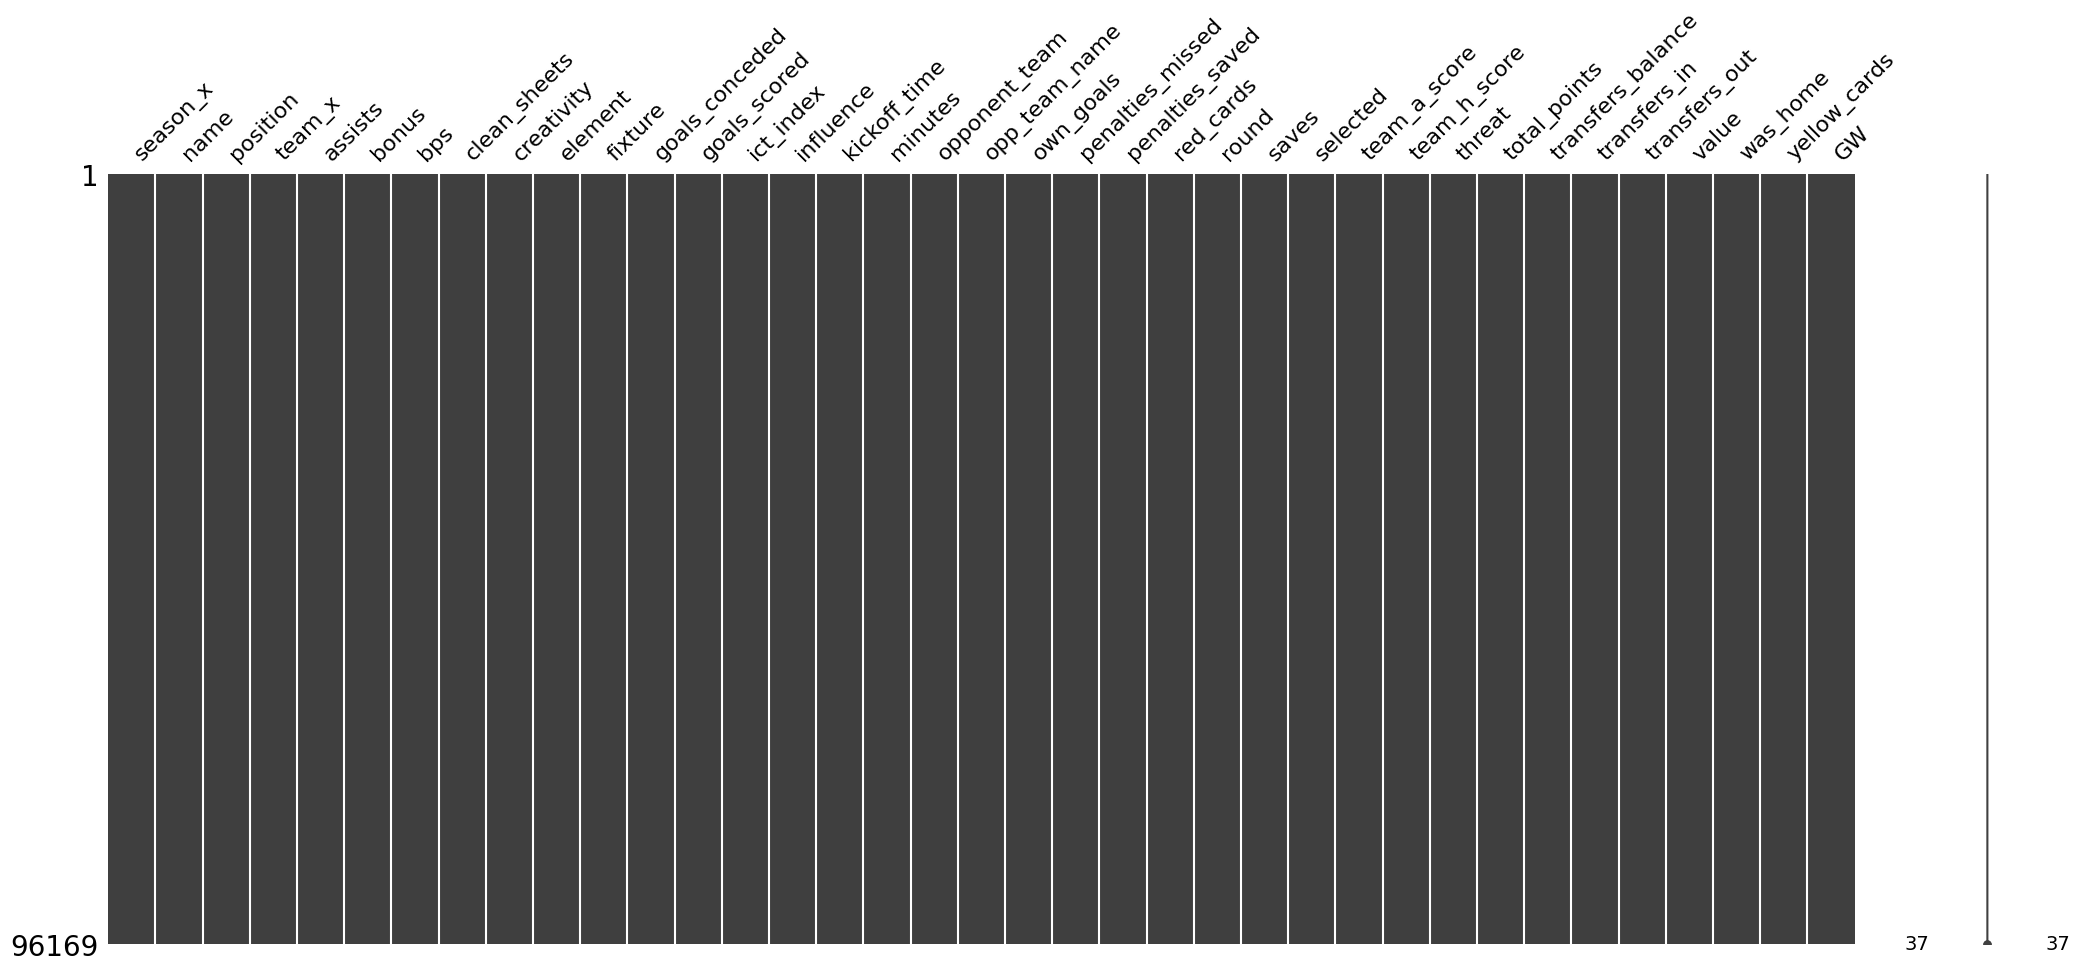

In [12]:
# checking if there is still nan values
msno.matrix(df)

In [13]:
# finding duplicate cells
dupe_groups = (
    
    df.groupby(["name", "GW", "season_x"])
      .size()
      .reset_index(name="count")
)

dupe_groups = dupe_groups[dupe_groups["count"] > 1]
print(dupe_groups)

                  name  GW season_x  count
41      Aaron Connolly  22  2021-22      2
46      Aaron Connolly  25  2021-22      2
54      Aaron Connolly  29  2021-22      2
61      Aaron Connolly  33  2021-22      2
161    Aaron Cresswell  19  2020-21      2
...                ...  ..      ...    ...
90212   Çaglar Söyüncü  36  2021-22      2
90215   Çaglar Söyüncü  37  2021-22      2
90235     Ørjan Nyland  19  2020-21      2
90242     Ørjan Nyland  26  2020-21      2
90251     Ørjan Nyland  35  2020-21      2

[5860 rows x 4 columns]


In [14]:
# printing a cell to ensuring that the cell is duplicate

df[(df["name"] == "Çaglar Söyüncü") & (df["GW"] == 36) & (df["season_x"] == "2021-22")]

player = df.loc[(df["name"] == "Çaglar Söyüncü") & (df["season_x"] == "2021-22")]
player.count()

season_x             38
name                 38
position             38
team_x               38
assists              38
bonus                38
bps                  38
clean_sheets         38
creativity           38
element              38
fixture              38
goals_conceded       38
goals_scored         38
ict_index            38
influence            38
kickoff_time         38
minutes              38
opponent_team        38
opp_team_name        38
own_goals            38
penalties_missed     38
penalties_saved      38
red_cards            38
round                38
saves                38
selected             38
team_a_score         38
team_h_score         38
threat               38
total_points         38
transfers_balance    38
transfers_in         38
transfers_out        38
value                38
was_home             38
yellow_cards         38
GW                   38
dtype: int64

In [15]:
# removed duplicated cells

# df = df.drop_duplicates(subset=["name", "GW", "season_x"], keep="first")

# dupe_groups = (
#     df.groupby(["name", "GW", "season_x"]) 
#       .size()
#       .reset_index(name="count")
# )

# dupe_groups = dupe_groups[dupe_groups["count"] > 1]
# print(dupe_groups)

In [16]:
# ensuring that there is a cell for each gameweek

salah_2017 = df.loc[(df["name"] == "Mohamed Salah") & (df["season_x"] == "2017-18")]
salah_2017.count()
salah_2017[["season_x","GW","opponent_team"]]

,season_x,GW,opponent_team
16564,2017-18,1,18
16565,2017-18,2,6
16566,2017-18,3,1
16567,2017-18,4,11
16568,2017-18,5,4
16569,2017-18,6,9
16570,2017-18,7,13
16571,2017-18,8,12
16572,2017-18,9,17
16573,2017-18,10,8


In [17]:
# 2️⃣ Now shift total_points correctly
df["upcoming_total_points"] = (
    df.groupby(["name", "season_x"])["total_points"].shift(-1)
)

df.isnull().sum()

season_x                    0
name                        0
position                    0
team_x                      0
assists                     0
bonus                       0
bps                         0
clean_sheets                0
creativity                  0
element                     0
fixture                     0
goals_conceded              0
goals_scored                0
ict_index                   0
influence                   0
kickoff_time                0
minutes                     0
opponent_team               0
opp_team_name               0
own_goals                   0
penalties_missed            0
penalties_saved             0
red_cards                   0
round                       0
saves                       0
selected                    0
team_a_score                0
team_h_score                0
threat                      0
total_points                0
transfers_balance           0
transfers_in                0
transfers_out               0
value     

<Axes: >

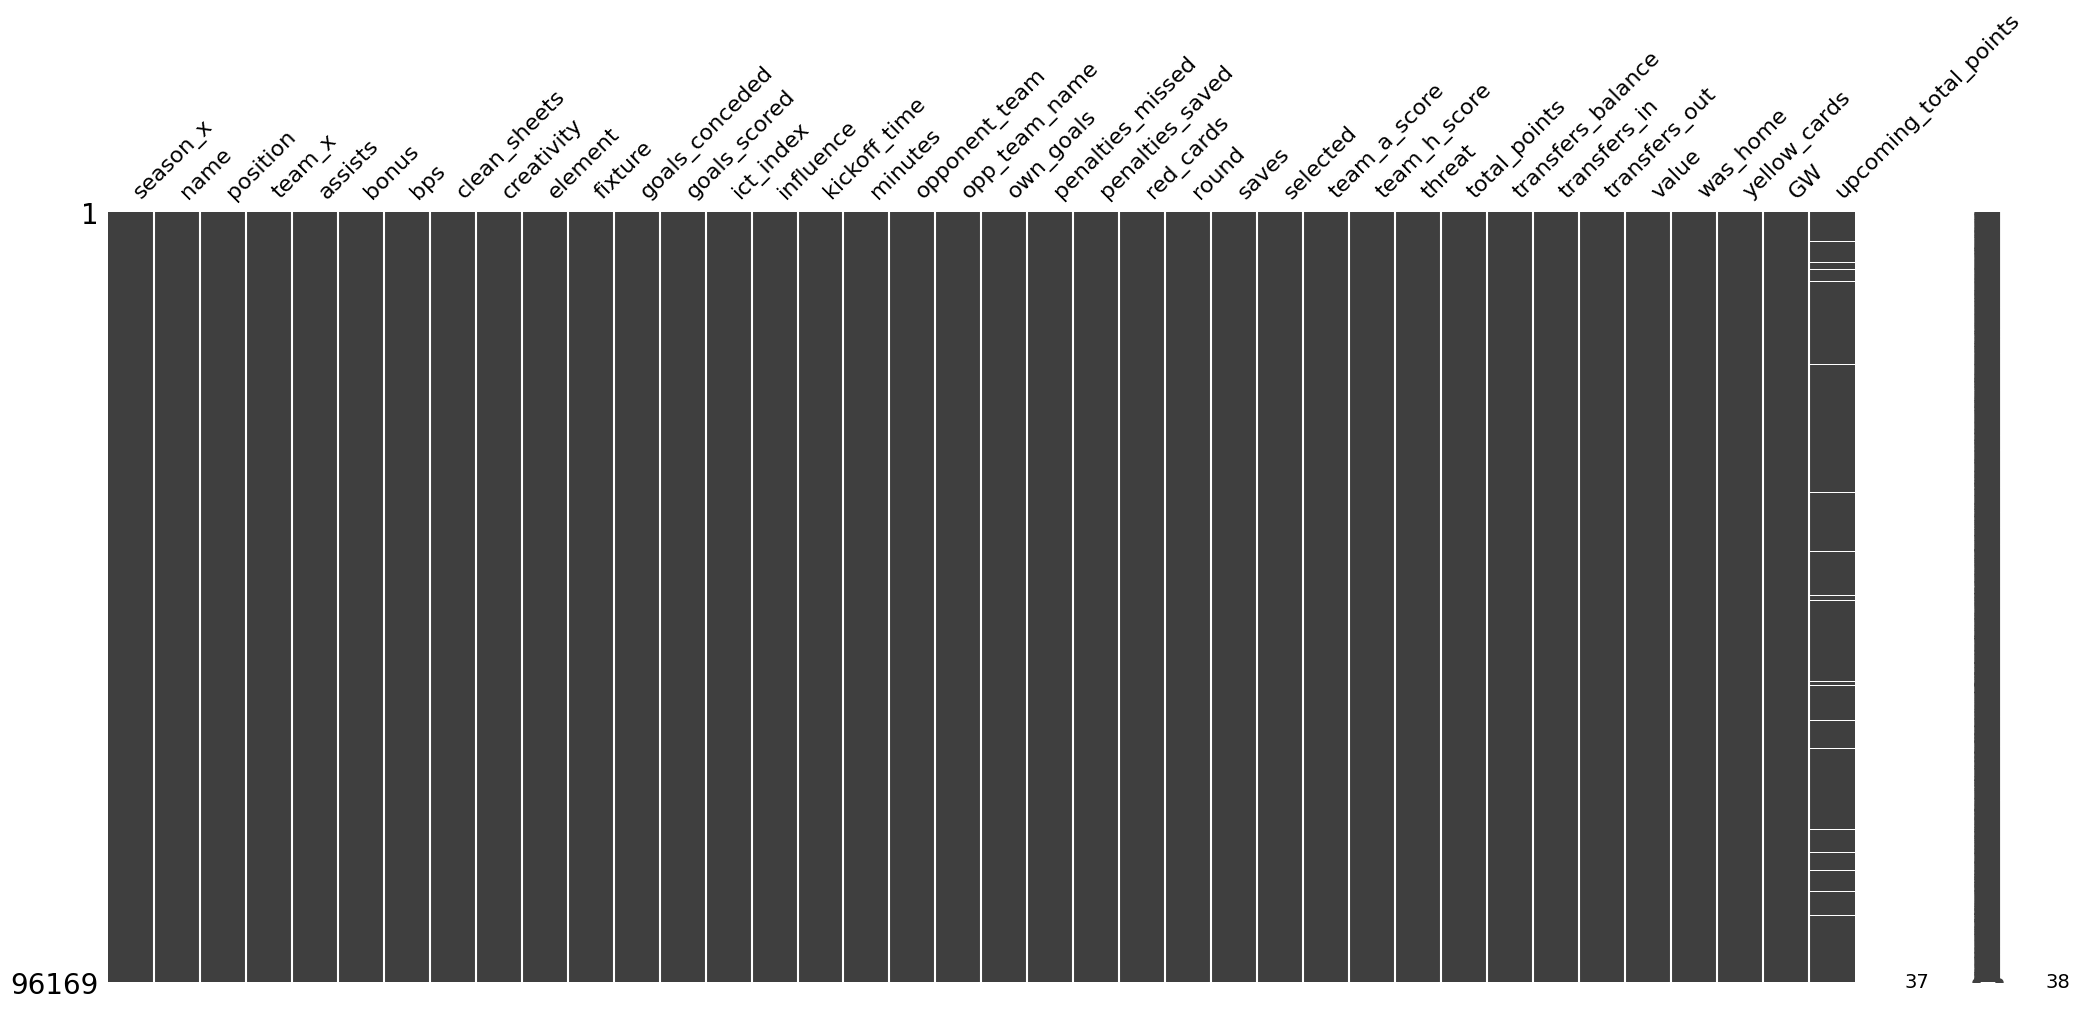

In [18]:
# checking if there is still nan values
msno.matrix(df)

In [19]:
# ensuring that all the nan values is in gameweek 38 (last gameweek)

nan_rows = df[df["upcoming_total_points"].isna()]

# print(nan_rows[["name", "season_x", "GW", "upcoming_total_points"]])
for idx, row in nan_rows.iterrows():
    if(row["GW"] != 38 ): 
        print(row[["name", "season_x", "GW", "upcoming_total_points"]])

In [20]:
# salah_2017 = df.loc[(df["name"] == "Aaron Cresswell") & (df["season_x"] == "2016-17")]
# salah_2017.count()

# for idx, row in salah_2017.iterrows():
#     print(row)
#     print(f"__________________________")

In [21]:
# df.loc[df["name"] == "MVictor Lindelöf", ["season_x" == "2017-18", "GW", "total_points", "upcoming_total_points"]]

# df[(df["GW"] == 10) & (df["season_x"] == "2017-18") & (df["name"] == "MVictor Lindelöf")]
# df[(df["GW"] == 10) & (df["season_x"] == "2017-18")]

<Axes: >

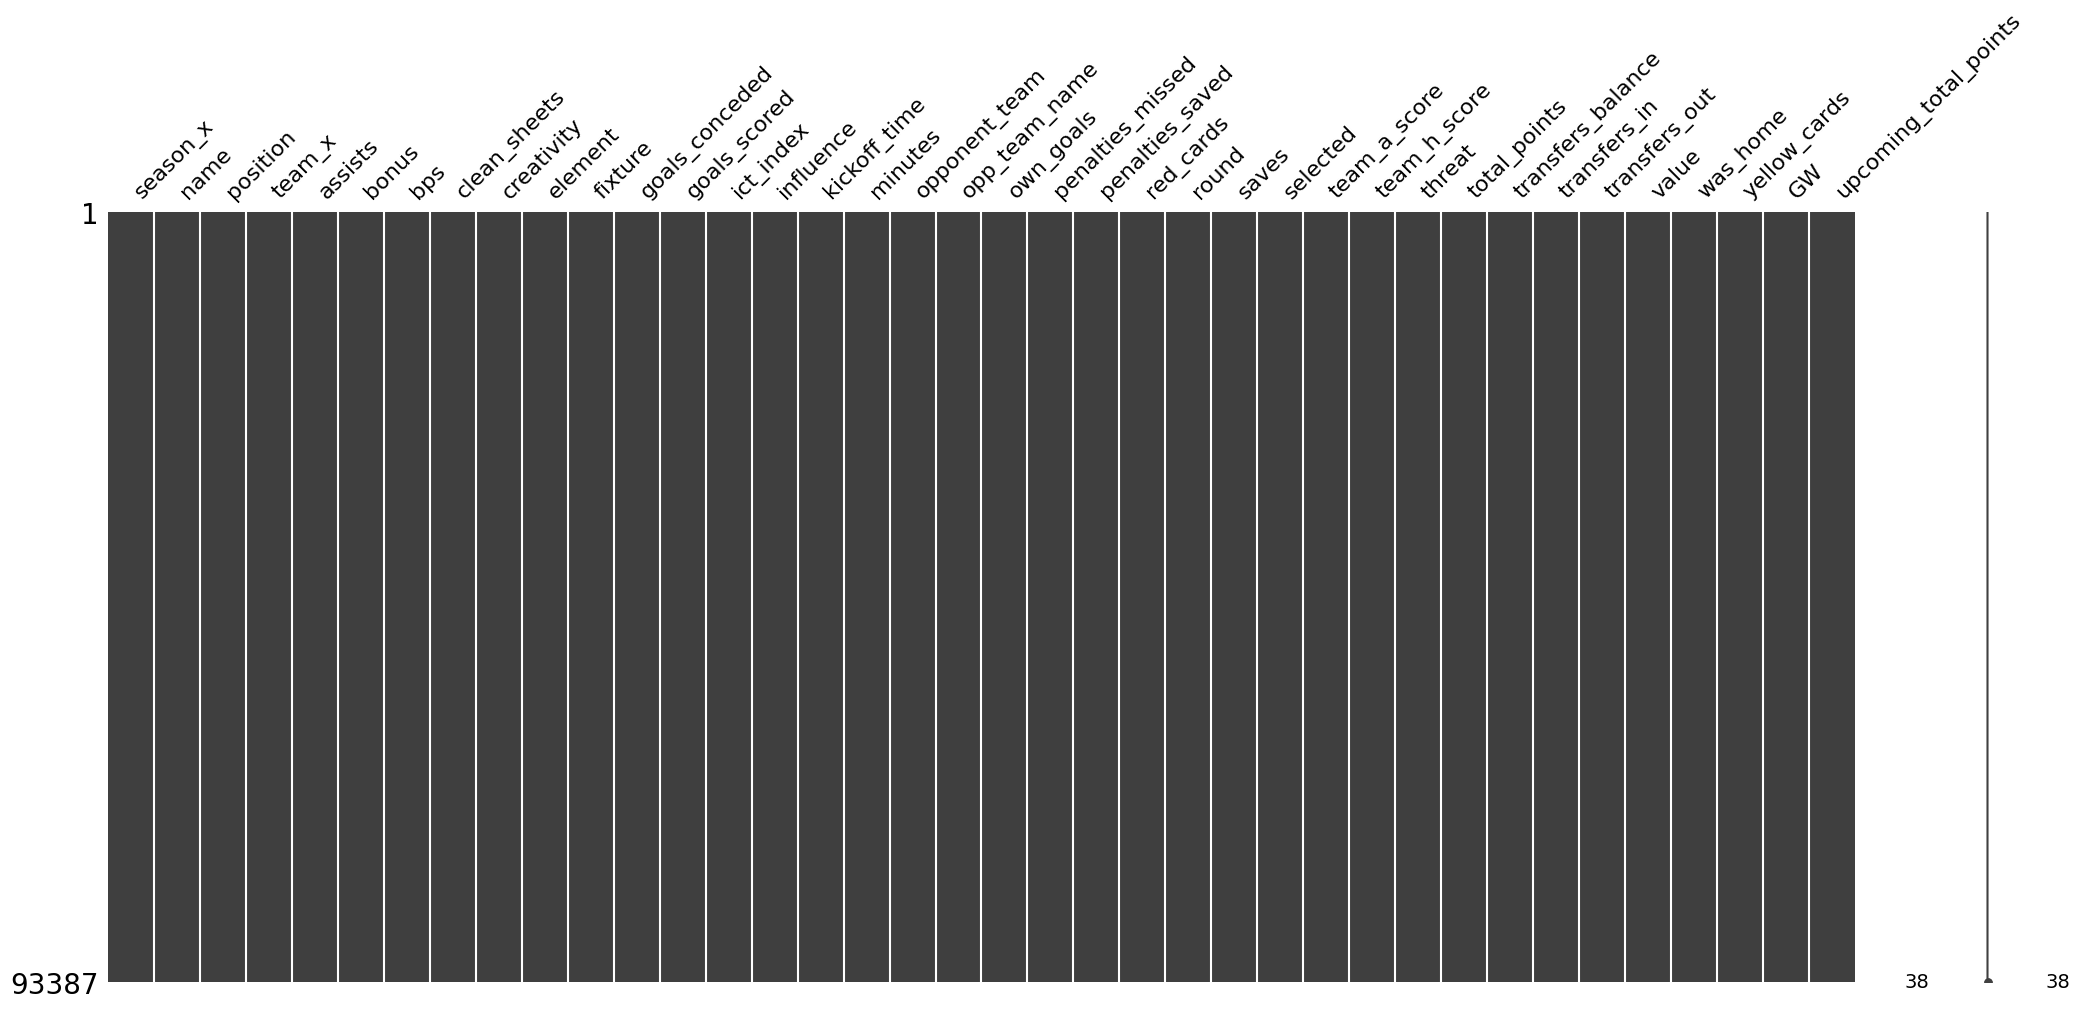

In [22]:
# drop gameweek 38 because it doesn't have upcoming_total_points so there is no predictions for this week

df = df.dropna(subset=["upcoming_total_points"]).reset_index(drop=True)
msno.matrix(df)

In [23]:
# drop columns related to popularity
df = df.drop(columns=['selected', 'transfers_out', 'transfers_in','transfers_balance'])

In [24]:
# created the form attribute

df["form"] = (
    df.groupby(["name", "season_x"])["total_points"]
      .rolling(window=4, min_periods=1)
      .mean()
      .reset_index(level=[0,1], drop=True) / 10
)

df.head(10)

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,team_a_score,team_h_score,threat,total_points,value,was_home,yellow_cards,GW,upcoming_total_points,form
0,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,0,0.0,454,...,1.0,2.0,0.0,0,55,False,0,1,0.0,0.000
1,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,0,0.0,454,...,0.0,1.0,0.0,0,55,True,0,2,0.0,0.000
2,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,0,0.0,454,...,1.0,3.0,0.0,0,54,False,0,3,0.0,0.000
3,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,0,0.0,454,...,4.0,2.0,0.0,0,54,True,0,4,0.0,0.000
4,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,0,0.0,454,...,2.0,4.0,0.0,0,54,False,0,5,0.0,0.000
5,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,0,0.0,454,...,3.0,0.0,0.0,0,54,True,0,6,0.0,0.000
6,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,0,0.0,454,...,1.0,1.0,0.0,0,53,True,0,7,6.0,0.000
7,2016-17,Aaron Cresswell,DEF,West Ham,1,0,23,1,25.1,454,...,1.0,0.0,6.0,6,53,False,0,8,0.0,0.150
8,2016-17,Aaron Cresswell,DEF,West Ham,0,0,0,0,0.0,454,...,0.0,1.0,0.0,0,53,True,0,9,1.0,0.150
9,2016-17,Aaron Cresswell,DEF,West Ham,0,0,12,0,7.9,454,...,0.0,2.0,0.0,1,53,False,0,10,2.0,0.175


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93387 entries, 0 to 93386
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   season_x               93387 non-null  object 
 1   name                   93387 non-null  object 
 2   position               93387 non-null  object 
 3   team_x                 93387 non-null  object 
 4   assists                93387 non-null  int64  
 5   bonus                  93387 non-null  int64  
 6   bps                    93387 non-null  int64  
 7   clean_sheets           93387 non-null  int64  
 8   creativity             93387 non-null  float64
 9   element                93387 non-null  int64  
 10  fixture                93387 non-null  int64  
 11  goals_conceded         93387 non-null  int64  
 12  goals_scored           93387 non-null  int64  
 13  ict_index              93387 non-null  float64
 14  influence              93387 non-null  float64
 15  ki

In [26]:
# Split dataset by position
df_GK = df[df['position'] == 'GK']
df_Player = df[df['position'] != 'GK']

In [27]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['position_encoded'] = encoder.fit_transform(df['position'])
df_Player['position_encoded'] = encoder.fit_transform(df_Player['position'])


/tmp/ipykernel_13/640508901.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Player['position_encoded'] = encoder.fit_transform(df_Player['position'])


In [28]:
# Feature and target 

# in case seperate models for players and goal keepers
X_Player = df_Player[['form', 'creativity', 'influence', 'threat', 'ict_index', 'goals_scored','assists', 'clean_sheets', 'yellow_cards', 'red_cards', 'penalties_missed', 'own_goals',"bps","bonus",'goals_conceded',"minutes", "value","position_encoded"]]
y_Player = df_Player['upcoming_total_points'] 

X_GK = df_GK[['form','goals_scored','assists', 'clean_sheets', 'yellow_cards', 'red_cards', 'penalties_missed', 'own_goals',"bps","bonus","goals_conceded", "minutes", "value", 'saves', 'penalties_saved']]
y_GK = df_GK['upcoming_total_points'] 

# for single model
X_overAll = df[['form', 'creativity', 'influence', 'threat', 'ict_index', 'goals_scored','assists', 'clean_sheets', 'yellow_cards', 'red_cards', 'penalties_missed', 'own_goals', "value","bps","bonus","goals_conceded", "minutes", 'saves', 'penalties_saved',"position_encoded"]]
y_overAll = df['upcoming_total_points'] 


# -non_numirical
# season_x
# name
# position
# team_x
# kickoff_time
# opp_team_name
# was_home


# -may be used
# opponent_team
# round
# team_a_score
# team_h_score
# total_points
# GW


# ids
# element
# fixture

In [29]:
# Scale the features 
scaler = StandardScaler() 
X_Player_scaled = scaler.fit_transform(X_Player)

X_GK_scaled = scaler.fit_transform(X_GK)

X_overAll_scaled = scaler.fit_transform(X_overAll)

In [30]:
# Split the dataset into train and test sets: for player
X_Player_train, X_Player_test, y_Player_train, y_Player_test = train_test_split(X_Player_scaled, y_Player, 
test_size=0.2, random_state=42) 

In [31]:
# Split the dataset into train and test sets: for Goal keeper
X_GK_train, X_GK_test, y_GK_train, y_GK_test = train_test_split(X_GK_scaled, y_GK, 
test_size=0.2, random_state=42) 

In [32]:
# Split the dataset into train and test sets: for single model
X_overAll_train, X_overAll_test, y_overAll_train, y_overAll_test = train_test_split(X_overAll_scaled, y_overAll, 
test_size=0.2, random_state=42) 

In [33]:
#Explore the size and dimension of the train and test data after splitting: 
print("Train data shape:",X_Player_train.shape, "Train Label shape", y_Player_train.shape) 
print("Test data shape:",X_Player_test.shape, "Test Label shape", y_Player_test.shape) 

Train data shape: (66435, 18) Train Label shape (66435,)
Test data shape: (16609, 18) Test Label shape (16609,)


In [34]:
#Explore the size and dimension of the train and test data after splitting: 
print("Train data shape:",X_GK_train.shape, "Train Label shape", y_GK_train.shape) 
print("Test data shape:",X_GK_test.shape, "Test Label shape", y_GK_test.shape) 

Train data shape: (8274, 15) Train Label shape (8274,)
Test data shape: (2069, 15) Test Label shape (2069,)


In [35]:
#Explore the size and dimension of the train and test data after splitting: 
print("Train data shape:",X_overAll_train.shape, "Train Label shape", y_overAll_train.shape) 
print("Test data shape:",X_overAll_test.shape, "Test Label shape", y_overAll_test.shape) 

Train data shape: (74709, 20) Train Label shape (74709,)
Test data shape: (18678, 20) Test Label shape (18678,)


In [36]:
model_Player = Sequential([ 
Input(shape=(X_Player_train.shape[1],)),
layers.Dense(16, activation='relu'), 
layers.Dense(32, activation='relu'),
layers.Dense(64, activation='relu'), 
layers.Dense(1, activation='linear')
]) 
model_Player.summary()

2025-10-21 18:30:51.197477: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,025 (11.82 KB)

 Trainable params: 3,025 (11.82 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model_GK = Sequential([ 
Input(shape=(X_GK_train.shape[1],)),
layers.Dense(18, activation='relu'), 
layers.Dense(32, activation='relu'),
layers.Dense(64, activation='relu'),  
layers.Dense(1, activation='linear')  
]) 
model_GK.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 18)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model_overAll = Sequential([ 
Input(shape=(X_overAll_train.shape[1],)),
layers.Dense(18, activation='relu'), 
layers.Dense(32, activation='relu'),
layers.Dense(64, activation='relu'),  
layers.Dense(1, activation='linear')  
]) 
model_overAll.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 18)             │           378 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,163 (12.36 KB)

 Trainable params: 3,163 (12.36 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model_Player.compile(optimizer='adam', 
loss='mse', 
metrics=['mae', 'mse']) 

In [40]:
model_GK.compile(optimizer='adam', 
loss='mse', 
metrics=['mae', 'mse']) 

In [41]:
model_overAll.compile(optimizer='adam', 
loss='mse', 
metrics=['mae', 'mse']) 

In [42]:
# early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# callbacks=[early_stop]

In [43]:
history_Player = model_Player.fit(X_Player_train, y_Player_train, epochs=20, validation_split=0.2, 
verbose=1) 

Epoch 1/20
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 5.1549 - mae: 1.3097 - mse: 5.1549 - val_loss: 4.9573 - val_mae: 1.2238 - val_mse: 4.9573
Epoch 2/20
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.9690 - mae: 1.2659 - mse: 4.9690 - val_loss: 4.9551 - val_mae: 1.2580 - val_mse: 4.9551
Epoch 3/20
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.9757 - mae: 1.2746 - mse: 4.9757 - val_loss: 4.9253 - val_mae: 1.2832 - val_mse: 4.9253
Epoch 4/20
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.8609 - mae: 1.2533 - mse: 4.8609 - val_loss: 4.9315 - val_mae: 1.2868 - val_mse: 4.9315
Epoch 5/20
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.7973 - mae: 1.2459 - mse: 4.7973 - val_loss: 4.9105 - val_mae: 1.3010 - val_mse: 4.9105
Epoch 6/20
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.8662 - mae: 1.2564 - mse: 4.8662 - val_loss: 4.9121 - val_mae: 1.2970 - val_mse: 4.9121
Epoch 7/20
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.8510 - mae: 1.2518 - mse

In [44]:
history_GK = model_GK.fit(X_GK_train, y_GK_train, epochs=20, validation_split=0.2, 
verbose=1) 

Epoch 1/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.8920 - mae: 0.9448 - mse: 3.8920 - val_loss: 4.0226 - val_mae: 1.0081 - val_mse: 4.0226
Epoch 2/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9928 - mae: 0.8581 - mse: 2.9928 - val_loss: 3.6764 - val_mae: 0.9522 - val_mse: 3.6764
Epoch 3/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9050 - mae: 0.8481 - mse: 2.9050 - val_loss: 3.5844 - val_mae: 1.0280 - val_mse: 3.5844
Epoch 4/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0516 - mae: 0.9043 - mse: 3.0516 - val_loss: 3.5028 - val_mae: 0.9505 - val_mse: 3.5028
Epoch 5/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0062 - mae: 0.8650 - mse: 3.0062 - val_loss: 3.4971 - val_mae: 1.0156 - val_mse: 3.4971
Epoch 6/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0419 - mae: 0.9042 - mse: 3.0419 - val_loss: 3.4353 - val_mae: 0.9123 - val_mse: 3.4353
Epoch 7/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0488 - mae: 0.8783 - mse: 3.0488 - val

In [45]:
history_overAll = model_overAll.fit(X_overAll_train, y_overAll_train, epochs=20, validation_split=0.2, 
verbose=1) 

Epoch 1/20
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 5.0108 - mae: 1.2602 - mse: 5.0108 - val_loss: 4.6993 - val_mae: 1.2155 - val_mse: 4.6993
Epoch 2/20
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.6493 - mae: 1.2143 - mse: 4.6493 - val_loss: 4.7765 - val_mae: 1.2322 - val_mse: 4.7765
Epoch 3/20
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.7129 - mae: 1.2231 - mse: 4.7129 - val_loss: 4.6875 - val_mae: 1.2271 - val_mse: 4.6875
Epoch 4/20
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4.6130 - mae: 1.2039 - mse: 4.6130 - val_loss: 4.7096 - val_mae: 1.1639 - val_mse: 4.7096
Epoch 5/20
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4.6880 - mae: 1.2144 - mse: 4.6880 - val_loss: 4.6696 - val_mae: 1.2143 - val_mse: 4.6696
Epoch 6/20
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.6686 - mae: 1.2134 - mse: 4.6686 - val_loss: 4.6714 - val_mae: 1.2106 - val_mse: 4.6714
Epoch 7/20
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.5602 - mae: 1.2006 - mse

In [46]:
from tensorflow.keras.callbacks import EarlyStopping 
early_stop = EarlyStopping(monitor='val_accuracy',mode='max', patience=3, 
restore_best_weights=True) 
history_Player = model_Player.fit(X_Player_train, y_Player_train, 
epochs=50, 
validation_split=0.2, 
verbose=1, 
callbacks=[early_stop]) 

Epoch 1/50
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.6922 - mae: 1.2352 - mse: 4.6922 - val_loss: 4.9335 - val_mae: 1.2532 - val_mse: 4.9335
Epoch 2/50
  75/1661 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.3717 - mae: 1.2099 - mse: 4.3717

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,mae,mse,val_loss,val_mae,val_mse
  current = self.get_monitor_value(logs)


1661/1661 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.7755 - mae: 1.2492 - mse: 4.7755 - val_loss: 4.9088 - val_mae: 1.2828 - val_mse: 4.9088
Epoch 3/50
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.8375 - mae: 1.2562 - mse: 4.8375 - val_loss: 4.9299 - val_mae: 1.2537 - val_mse: 4.9299
Epoch 4/50
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.8529 - mae: 1.2650 - mse: 4.8529 - val_loss: 4.9434 - val_mae: 1.2599 - val_mse: 4.9434
Epoch 5/50
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.7404 - mae: 1.2457 - mse: 4.7404 - val_loss: 4.9496 - val_mae: 1.2807 - val_mse: 4.9496
Epoch 6/50
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.8541 - mae: 1.2621 - mse: 4.8541 - val_loss: 4.9517 - val_mae: 1.2205 - val_mse: 4.9517
Epoch 7/50
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.8123 - mae: 1.2476 - mse: 4.8123 - val_loss: 4.9422 - val_mae: 1.3033 - val_mse: 4.9422
Epoch 8/50
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.8574 - mae: 1.2542 - mse: 4.8574 - 

In [47]:
from tensorflow.keras.callbacks import EarlyStopping 
early_stop = EarlyStopping(monitor='val_accuracy',mode='max', patience=3, 
restore_best_weights=True) 
history_GK = model_GK.fit(X_GK_train, y_GK_train, 
epochs=50, 
validation_split=0.2, 
verbose=1, 
callbacks=[early_stop]) 

Epoch 1/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9576 - mae: 0.8649 - mse: 2.9576 - val_loss: 3.4497 - val_mae: 0.8711 - val_mse: 3.4497
Epoch 2/50
 84/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9204 - mae: 0.8394 - mse: 2.9204

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,mae,mse,val_loss,val_mae,val_mse
  current = self.get_monitor_value(logs)


207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9103 - mae: 0.8446 - mse: 2.9103 - val_loss: 3.5081 - val_mae: 0.9113 - val_mse: 3.5081
Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.8531 - mae: 0.8550 - mse: 2.8531 - val_loss: 3.4258 - val_mae: 0.9309 - val_mse: 3.4258
Epoch 4/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0252 - mae: 0.8586 - mse: 3.0252 - val_loss: 3.4257 - val_mae: 0.9762 - val_mse: 3.4257
Epoch 5/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1086 - mae: 0.8791 - mse: 3.1086 - val_loss: 3.5114 - val_mae: 0.9649 - val_mse: 3.5114
Epoch 6/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0296 - mae: 0.8757 - mse: 3.0296 - val_loss: 3.4782 - val_mae: 0.9126 - val_mse: 3.4782
Epoch 7/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9753 - mae: 0.8592 - mse: 2.9753 - val_loss: 3.4435 - val_mae: 0.9530 - val_mse: 3.4435
Epoch 8/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.8257 - mae: 0.8476 - mse: 2.8257 - val_loss: 3.46

In [48]:
from tensorflow.keras.callbacks import EarlyStopping 
early_stop = EarlyStopping(monitor='val_accuracy',mode='max', patience=3, 
restore_best_weights=True) 
history_overAll = model_overAll.fit(X_overAll_train, y_overAll_train, 
epochs=50, 
validation_split=0.2, 
verbose=1, 
callbacks=[early_stop]) 

Epoch 1/50
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4.6096 - mae: 1.2049 - mse: 4.6096 - val_loss: 4.6891 - val_mae: 1.2181 - val_mse: 4.6891
Epoch 2/50
  76/1868 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.7563 - mae: 1.0961 - mse: 3.7563

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,mae,mse,val_loss,val_mae,val_mse
  current = self.get_monitor_value(logs)


1868/1868 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.5535 - mae: 1.1975 - mse: 4.5535 - val_loss: 4.7315 - val_mae: 1.1542 - val_mse: 4.7315
Epoch 3/50
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.6162 - mae: 1.2026 - mse: 4.6162 - val_loss: 4.6994 - val_mae: 1.2169 - val_mse: 4.6994
Epoch 4/50
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.5019 - mae: 1.1861 - mse: 4.5019 - val_loss: 4.7716 - val_mae: 1.1733 - val_mse: 4.7716
Epoch 5/50
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.6922 - mae: 1.2166 - mse: 4.6922 - val_loss: 4.7170 - val_mae: 1.1814 - val_mse: 4.7170
Epoch 6/50
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.6101 - mae: 1.1988 - mse: 4.6101 - val_loss: 4.7038 - val_mae: 1.1866 - val_mse: 4.7038
Epoch 7/50
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.5111 - mae: 1.1936 - mse: 4.5111 - val_loss: 4.7062 - val_mae: 1.2243 - val_mse: 4.7062
Epoch 8/50
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.5445 - mae: 1.1913 - mse: 4.5445 - 

In [49]:
history_Player = model_Player.fit(X_Player_train, y_Player_train, epochs=20, batch_size=32, 
validation_split=0.2, verbose=1) 

Epoch 1/20
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.6368 - mae: 1.2278 - mse: 4.6368 - val_loss: 5.0490 - val_mae: 1.2642 - val_mse: 5.0490
Epoch 2/20
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.5913 - mae: 1.2144 - mse: 4.5913 - val_loss: 5.0441 - val_mae: 1.2999 - val_mse: 5.0441
Epoch 3/20
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.5935 - mae: 1.2229 - mse: 4.5935 - val_loss: 5.0959 - val_mae: 1.2361 - val_mse: 5.0959
Epoch 4/20
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.5815 - mae: 1.2149 - mse: 4.5815 - val_loss: 5.0583 - val_mae: 1.2409 - val_mse: 5.0583
Epoch 5/20
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.6524 - mae: 1.2298 - mse: 4.6524 - val_loss: 5.0141 - val_mae: 1.2808 - val_mse: 5.0141
Epoch 6/20
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.6548 - mae: 1.2286 - mse: 4.6548 - val_loss: 5.0347 - val_mae: 1.2969 - val_mse: 5.0347
Epoch 7/20
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.6931 - mae: 1.2282 - mse

In [50]:
history_GK = model_GK.fit(X_GK_train, y_GK_train, epochs=20, batch_size=32, 
validation_split=0.2, verbose=1)

Epoch 1/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.7938 - mae: 0.8387 - mse: 2.7938 - val_loss: 3.5157 - val_mae: 0.9909 - val_mse: 3.5157
Epoch 2/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9038 - mae: 0.8776 - mse: 2.9038 - val_loss: 3.5400 - val_mae: 0.9276 - val_mse: 3.5400
Epoch 3/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.8212 - mae: 0.8378 - mse: 2.8212 - val_loss: 3.5077 - val_mae: 0.9413 - val_mse: 3.5077
Epoch 4/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6896 - mae: 0.7853 - mse: 2.6896 - val_loss: 3.5217 - val_mae: 0.9158 - val_mse: 3.5217
Epoch 5/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6366 - mae: 0.8000 - mse: 2.6366 - val_loss: 3.5227 - val_mae: 0.9253 - val_mse: 3.5227
Epoch 6/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.8222 - mae: 0.8203 - mse: 2.8222 - val_loss: 3.5388 - val_mae: 0.9848 - val_mse: 3.5388
Epoch 7/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.5864 - mae: 0.8140 - mse: 2.5864 - val

In [51]:
history_overAll = model_overAll.fit(X_overAll_train, y_overAll_train, epochs=20, batch_size=32, 
validation_split=0.2, verbose=1)

Epoch 1/20
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4.3022 - mae: 1.1637 - mse: 4.3022 - val_loss: 4.8341 - val_mae: 1.2360 - val_mse: 4.8341
Epoch 2/20
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4.3786 - mae: 1.1726 - mse: 4.3786 - val_loss: 4.8230 - val_mae: 1.2360 - val_mse: 4.8230
Epoch 3/20
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4.3421 - mae: 1.1745 - mse: 4.3421 - val_loss: 4.8387 - val_mae: 1.2539 - val_mse: 4.8387
Epoch 4/20
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.4009 - mae: 1.1807 - mse: 4.4009 - val_loss: 4.8949 - val_mae: 1.2538 - val_mse: 4.8949
Epoch 5/20
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.3447 - mae: 1.1723 - mse: 4.3447 - val_loss: 4.8538 - val_mae: 1.2256 - val_mse: 4.8538
Epoch 6/20
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.4785 - mae: 1.1933 - mse: 4.4785 - val_loss: 4.8637 - val_mae: 1.2154 - val_mse: 4.8637
Epoch 7/20
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.4229 - mae: 1.1789 - mse

In [52]:
# # Plot accuracy, precision, and recall from training history 
# plt.plot(history_Player.history['accuracy'], label='Train Accuracy') 
# plt.plot(history_Player.history['val_accuracy'], label='Val Accuracy') 
 
# plt.plot(history_Player.history['precision'], label='Train Precision') 
# plt.plot(history_Player.history['val_precision'], label='Val Precision') 
 
# plt.plot(history_Player.history['recall'], label='Train Recall') 
# plt.plot(history_Player.history['val_recall'], label='Val Recall') 
 
# plt.xlabel('Epoch') 
# plt.ylabel('Score') 
# plt.title('Training Progress (Accuracy, Precision, Recall)') 
# plt.legend() 
# plt.show() 

In [53]:
# # Plot accuracy, precision, and recall from training history 
# plt.plot(history_GK.history['accuracy'], label='Train Accuracy') 
# plt.plot(history_GK.history['val_accuracy'], label='Val Accuracy') 
 
# plt.plot(history_GK.history['precision'], label='Train Precision') 
# plt.plot(history_GK.history['val_precision'], label='Val Precision') 
 
# plt.plot(history_GK.history['recall'], label='Train Recall') 
# plt.plot(history_GK.history['val_recall'], label='Val Recall') 
 
# plt.xlabel('Epoch') 
# plt.ylabel('Score') 
# plt.title('Training Progress (Accuracy, Precision, Recall)') 
# plt.legend() 
# plt.show() 

In [54]:
# test_loss, test_accuracy, test_precision, test_recall = model_Player.evaluate(X_test, 
# y_test, verbose=0) 
 
# print("Test Loss:", test_loss) 
# print("Test Accuracy:", test_accuracy) 
# print("Test Precision:", test_precision) 
# print("Test Recall:", test_recall) 

In [55]:
# test_loss, test_accuracy, test_precision, test_recall = model_GK.evaluate(X_GK_test, 
# y_GK_test, verbose=0) 
 
# print("Test Loss:", test_loss) 
# print("Test Accuracy:", test_accuracy) 
# print("Test Precision:", test_precision) 
# print("Test Recall:", test_recall)

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model_Player.predict(X_Player_test)
mae = mean_absolute_error(y_Player_test, y_pred)
mse = mean_squared_error(y_Player_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_Player_test, y_pred)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Convert Series to NumPy array, then flatten both
y_test = y_Player_test.to_numpy().flatten()
y_pred_flat = np.array(y_pred).flatten()

# Calculate MAPE safely
mape = np.nanmean(np.abs((y_test - y_pred_flat) / np.where(y_test == 0, np.nan, y_test))) * 100

print(f"MAPE: {mape:.2f}%")

520/520 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 1.30, MSE: 4.87, RMSE: 2.21, R²: 0.23
MAPE: 79.80%


In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model_GK.predict(X_GK_test)
mae = mean_absolute_error(y_GK_test, y_pred)
mse = mean_squared_error(y_GK_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_GK_test, y_pred)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Convert Series to NumPy array, then flatten both
y_test = y_GK_test.to_numpy().flatten()
y_pred_flat = np.array(y_pred).flatten()

# Calculate MAPE safely
mape = np.nanmean(np.abs((y_test - y_pred_flat) / np.where(y_test == 0, np.nan, y_test))) * 100

print(f"MAPE: {mape:.2f}%")

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 0.99, MSE: 3.60, RMSE: 1.90, R²: 0.38
MAPE: 87.47%


In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model_overAll.predict(X_overAll_test)
mae = mean_absolute_error(y_overAll_test, y_pred)
mse = mean_squared_error(y_overAll_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_overAll_test, y_pred)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Convert Series to NumPy array, then flatten both
y_test = y_overAll_test.to_numpy().flatten()
y_pred_flat = np.array(y_pred).flatten()

# Calculate MAPE safely
mape = np.nanmean(np.abs((y_test - y_pred_flat) / np.where(y_test == 0, np.nan, y_test))) * 100

print(f"MAPE: {mape:.2f}%")

584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 1.23, MSE: 4.79, RMSE: 2.19, R²: 0.24
MAPE: 78.16%


In [59]:
# if player['position'] == 'GK':
#     prediction = model_GK.predict(player_features)
# else:
#     prediction = model_Player.predict(player_features)